## Activation Function

In [4]:
import numpy as np
import matplotlib.pylab as plt

### Step Function

$StepFunction(x)=\begin{cases}
\ 1\quad (x>0)\\
\ 0\quad (x\le 0)\end{cases}$

In [5]:
def step_function(x):
    if x>0:
        return 1
    else:
        return 0
    

In [6]:
def step_function(x):
    y = x > 0
    return y.astype(np.int0)

In [7]:
step_function(np.array([-1,0,1]))

array([0, 0, 1])

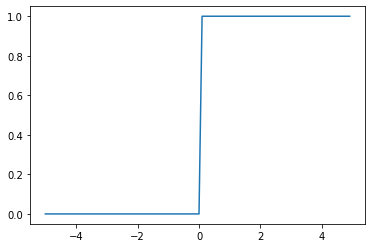

In [8]:
x = np.arange(-5,5,0.1)
y = step_function(x)
plt.plot(x,y)
plt.show()

### Sigmoid Function

$SigmoidFunction(x)=\cfrac{1}{1+e^{-x}}$

In [9]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [10]:
sigmoid(np.array([-1,0,1,2]))

array([0.26894142, 0.5       , 0.73105858, 0.88079708])

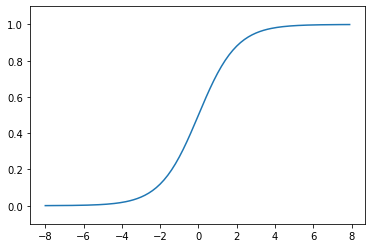

In [11]:
x = np.arange(-8,8,0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

### ReLu : Rectified Linear Unit

$ReLu(x)=\begin{cases}
\ x\quad (x>0)\\
\ 0\quad (x\le 0)\end{cases}$

In [12]:
def relu(x):
    return np.maximum(0,x)

## MLP (3 Layers)

In [13]:
def identity_function(x):
    return x

In [14]:
def  init_network():
    network = {}
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['B1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['B2'] = np.array([0.1,0.2])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['B3'] = np.array([0.1,0.2])
    
    return network

In [15]:
def forward(network,x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    B1, B2, B3 = network['B1'], network['B2'], network['B3']
    
    a1 = np.dot(x,W1)+B1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2)+B2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3)+B3
    y = identity_function(a3)
    
    return y

In [16]:
network = init_network()
x = np.array([1.0,5.0])
y = forward(network,x)
print(y)

[0.33098211 0.72778046]


### Softmax Function

$y_k=\dfrac{e^{a_k}}{\sum\limits^n_{i=1}e^{a_i}}\qquad$ n : #neuron

In [30]:
def softmax(a):
    # c = np.max(a)
    # exp_a = np.exp(a-c)
    # sum_exp_a = np.sum(exp_a)
    # y = exp_a / sum_exp_a
    if a.ndim == 2:
        a = a.T
        a = a - np.max(a, axis=0)
        y = np.exp(a) / np.sum(np.exp(a),axis=0)
        return y.T
    
    a = a - np.max(a)
    return np.exp(a) / np.sum(np.exp(a))

In [29]:
a = np.array([0.3,2.9,4.0])
print(softmax(a))
print(np.sum(softmax(a)))

[0.01821127 0.24519181 0.73659691]
1.0
